In [1]:
cd ..

C:\Users\insommer\Documents\AnalysisCode


In [2]:
import sys
# sys.path.append(r'C:\Users\Sommer Lab\Documents\Analysis Code')
import os
from scipy.optimize import curve_fit
from scipy.ndimage import rotate
from scipy.integrate import simpson

from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy import ndimage
from skimage.filters import threshold_otsu

In [3]:
def ImgShow(imgs):
    imgNo = len(imgs)
    fig, axs = plt.subplots(imgNo,1, figsize=(5,4*imgNo))
    for ii, img in enumerate(imgs):
        axs[ii].imshow(img)
        
def Plot(imgs):
    imgNo = len(imgs)
    fig, axs = plt.subplots(imgNo,1, figsize=(5,4*imgNo))
    for ii, img in enumerate(imgs):
        axs[ii].plot(img.mean(axis=1))
        
def PlotOverlap(imgs):
    imgNo = len(imgs)
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    for ii, img in enumerate(imgs):
        ax.plot(img.mean(axis=1), label=str(ii))
    plt.legend()
    
def Normalize(imgs):
    if type(imgs) is not list: imgs = [imgs]
    imgsNorm = []
    for ii, img in enumerate(imgs):
        img = img - img.min()
        imgsNorm.append(img / img.max())
    return imgsNorm

7.18.2023  
ODT align side image.  
C:\Users\Sommer Lab\Documents\Data\2023\07-2023\18 Jul 2023\Andor\odt align


In [4]:
plt.rcParams['image.cmap'] = 'gray'

In [393]:
imgs = np.load('Applications\imgs.npy')

In [394]:
#Normalize the pictures
for ii, img in enumerate(imgs):
    img = img - img.min()
    imgs[ii] = img / img.max()

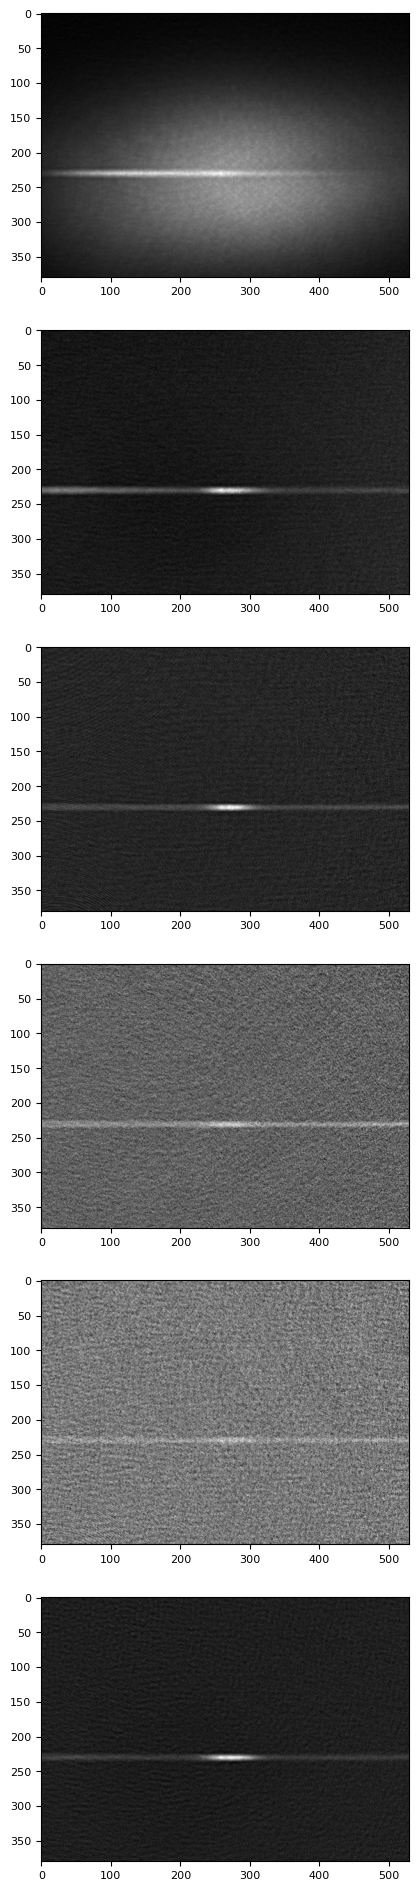

In [395]:
ImgShow(imgs)    

In [396]:
img0 = imgs[4].copy()

In [397]:
sigma = 10
img0gf = ndimage.gaussian_filter(img0, sigma)
img0uf = ndimage.uniform_filter(img0, sigma*2.5)

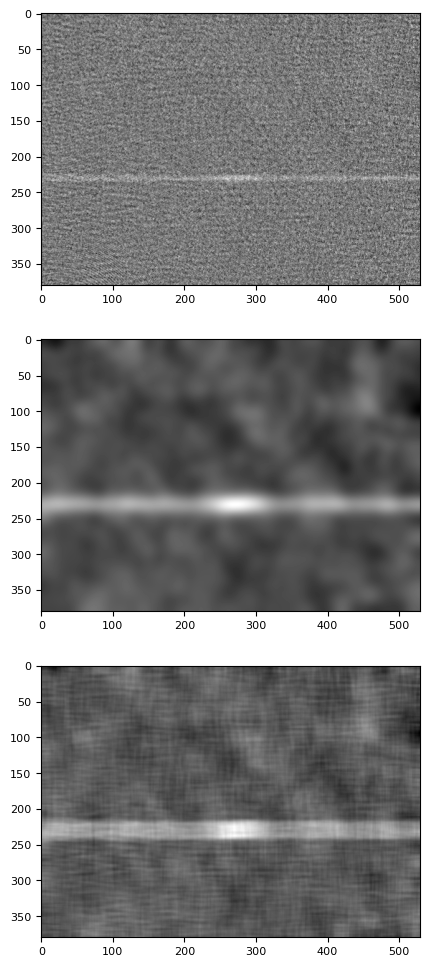

In [398]:
ImgShow([img0, img0gf, img0uf])

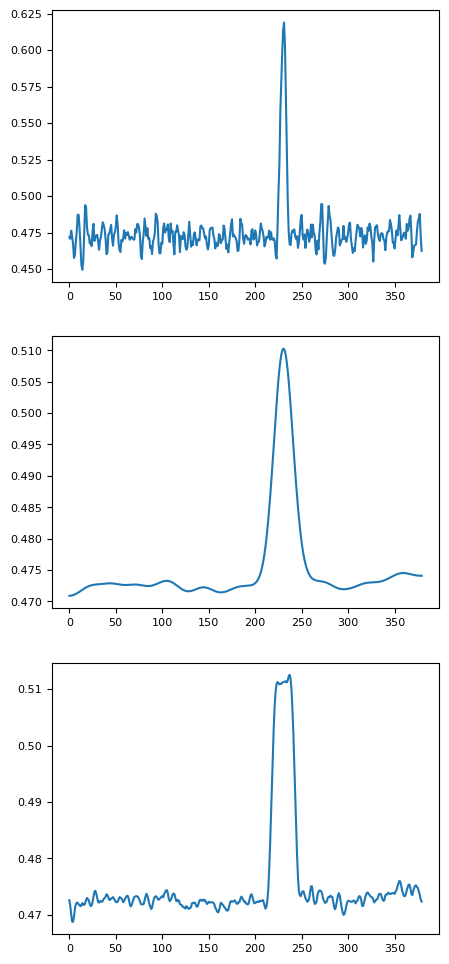

In [399]:
Plot([img0, img0gf, img0uf])

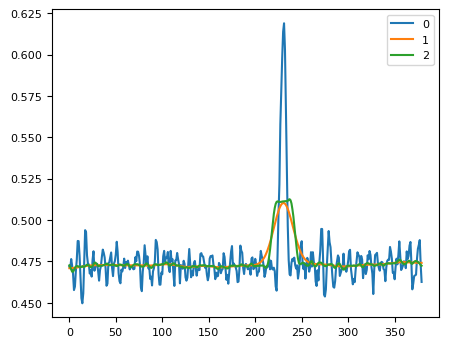

In [400]:
PlotOverlap([img0, img0gf, img0uf])

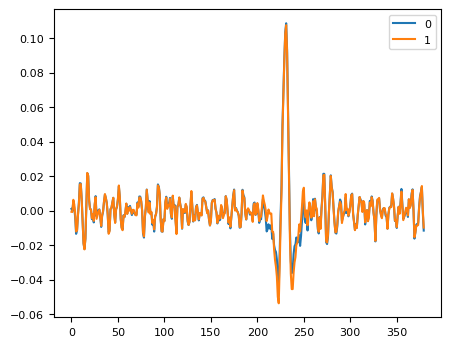

In [401]:
diffgf = img0 - img0gf
diffuf = img0 - img0uf

# diffgf, diffuf = Normalize([diffgf, diffuf])
PlotOverlap([diffgf, diffuf])

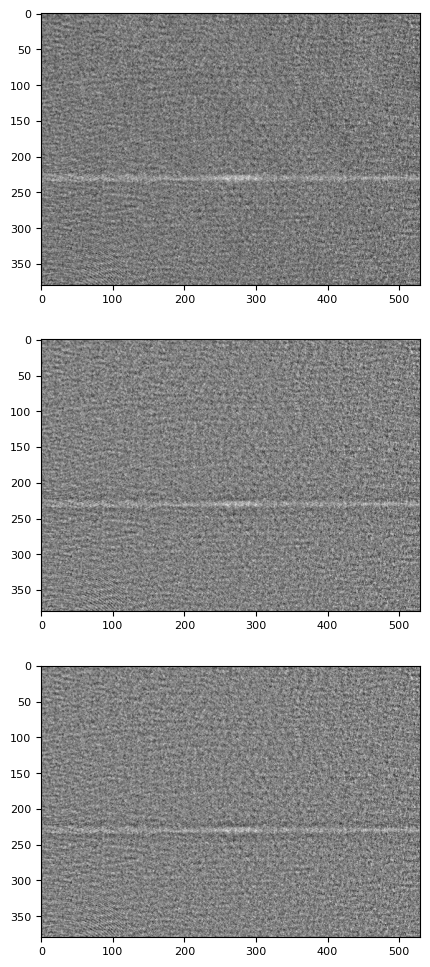

In [402]:
ImgShow([img0, diffgf, diffuf])

In [403]:
thrgf = threshold_otsu(diffgf
#                        [200:270, 200:350]
                      )
thruf = threshold_otsu(diffuf)

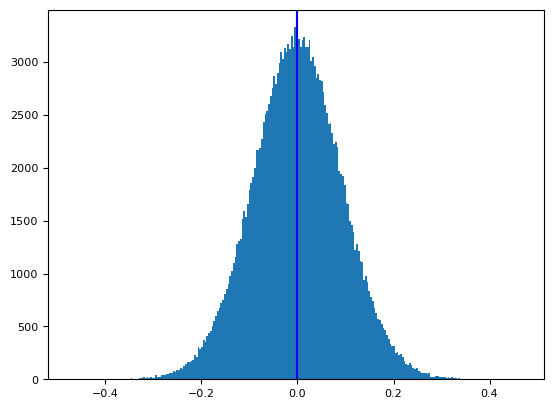

In [404]:
plt.hist(diffgf.flatten(), bins=256)
plt.axvline(thrgf, c='r')
plt.axvline(thruf, c='b')

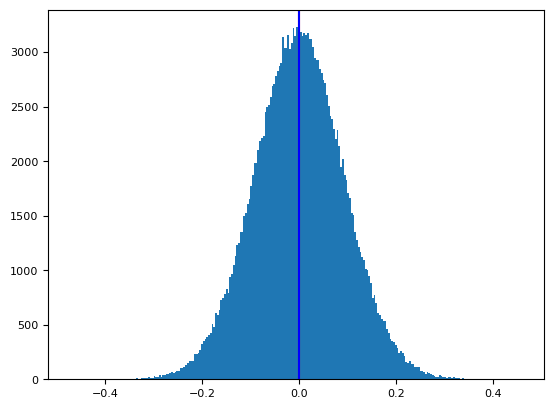

In [405]:
plt.hist(diffuf.flatten(), bins=256)
plt.axvline(thrgf, c='r')
plt.axvline(thruf, c='b')

In [406]:
thrgf

-0.0007183888823352191

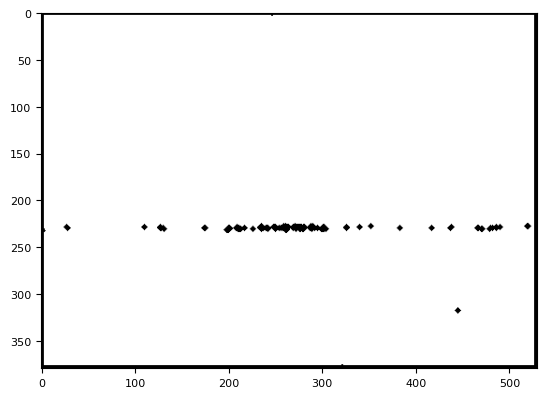

In [413]:
mask = diffgf<thrgf
mask = ndimage.binary_dilation(mask, iterations=3)
mask = ndimage.binary_erosion(mask, iterations=3)
# mask = ndimage.binary_closing(mask, iterations=3)

plt.imshow(mask)

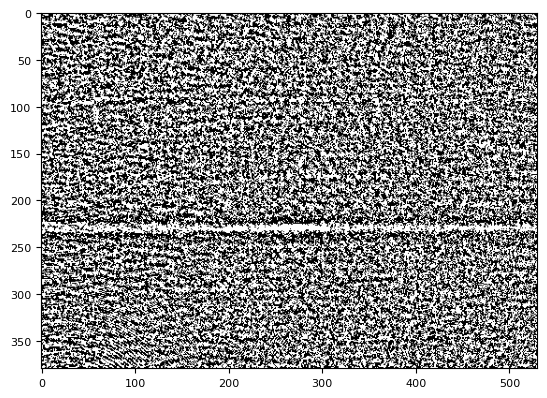

In [414]:
plt.imshow(diffuf>thruf)

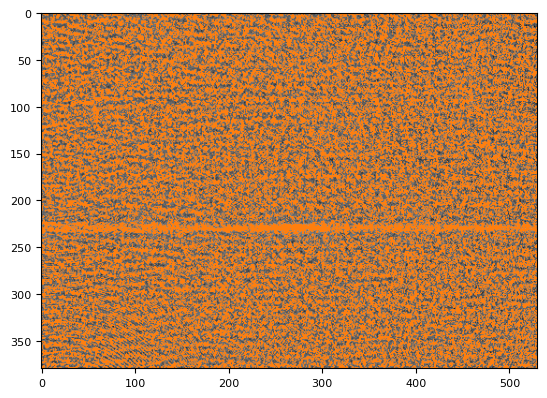

In [415]:
fig, ax = plt.subplots()
ax.imshow(img0, alpha=(diffgf<thrgf).astype(float))
ax.set_facecolor("tab:orange")
# plt.imshow(diffgf>thrgf)

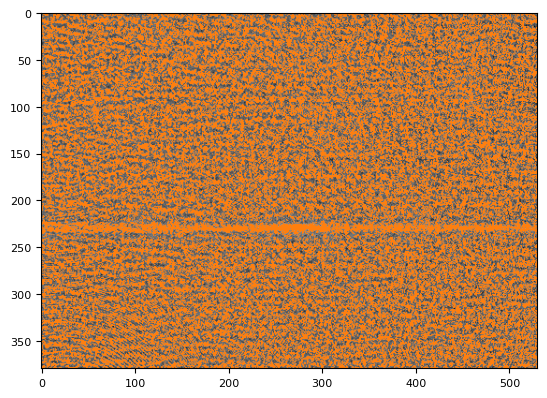

In [416]:
fig, ax = plt.subplots()
ax.imshow(img0, alpha=(diffuf<(thruf*0.4)).astype(float))
ax.set_facecolor("tab:orange")
# plt.imshow(diffgf>thrgf)

In [73]:
diffgf>thrgf

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [112]:
sigma = 10

img0_1D = img0.mean(1)
img0_1Dgf = ndimage.gaussian_filter1d(img0_1D, sigma)
img0_1Duf = ndimage.uniform_filter1d(img0_1D, sigma*2)
xx = np.arange(len(img0_1D))

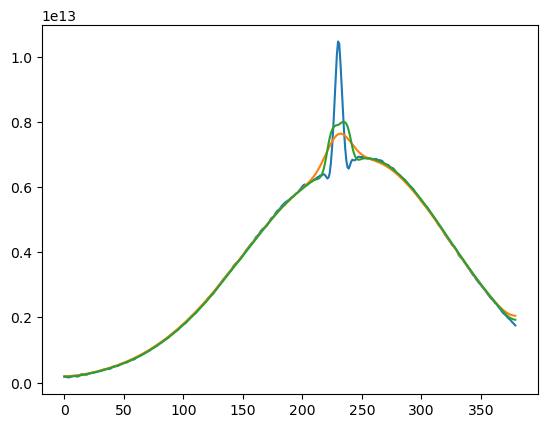

In [63]:
plt.plot(np.array([img0_1D, img0_1Dgf, img0_1Duf]).T)

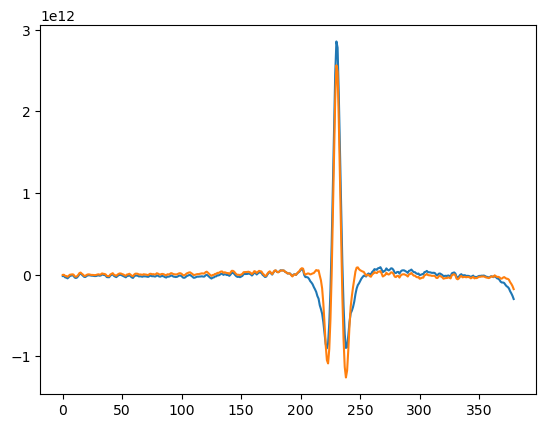

In [64]:
diff1Dgf = img0_1D - img0_1Dgf
diff1Duf = img0_1D - img0_1Duf

plt.plot(np.array([diff1Dgf, diff1Duf]).T)

In [66]:
thr1Dgf = threshold_otsu(diff1Dgf)
thr1Duf = threshold_otsu(diff1Duf)

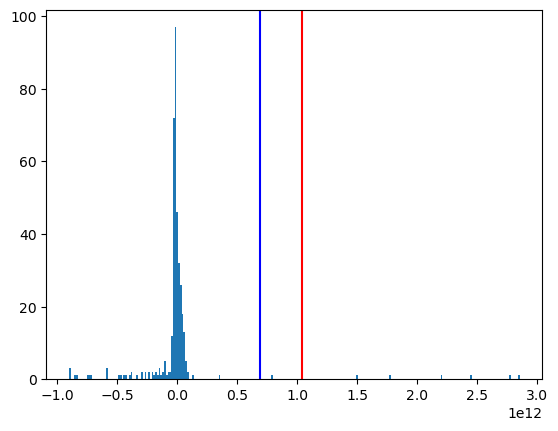

In [68]:
plt.hist(diff1Dgf, bins=256)
plt.axvline(thr1Dgf, c='r')
plt.axvline(thr1Duf, c='b')

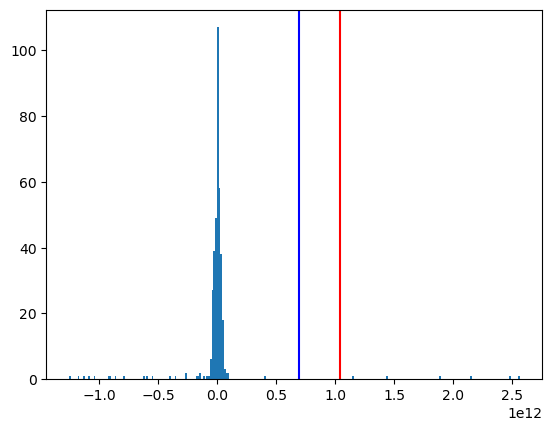

In [69]:
plt.hist(diff1Duf, bins=256)
plt.axvline(thr1Dgf, c='r')
plt.axvline(thr1Duf, c='b')

In [132]:
print('{:.4e}'.format(thr1Dgf))

1.0435e+12


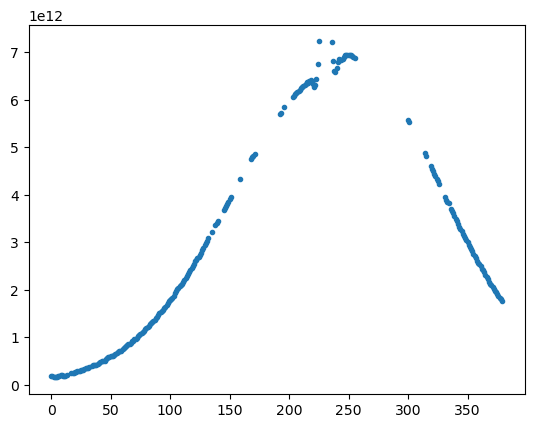

In [145]:
mask1Duf = diff1Dgf < thr1Dgf*0.001
plt.plot(xx[mask1Duf], img0_1D[mask1Duf], '.')

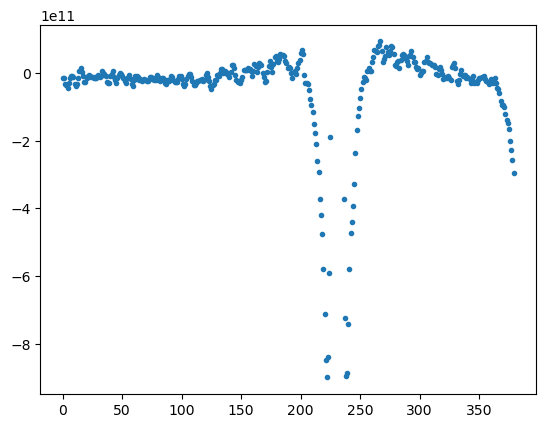

In [141]:
mask1Duf = diff1Dgf < thr1Dgf*0.1
plt.plot(xx[mask1Duf], diff1Dgf[mask1Duf], '.')

In [203]:
sigma = 50

img1_1D = Normalize(img1.mean(0))[0]
img1_1Dgf = ndimage.gaussian_filter1d(img1_1D, sigma, mode='nearest')
img1_1Duf = ndimage.uniform_filter1d(img1_1D, sigma*2, mode='nearest')
xx = np.arange(len(img1_1D))

In [204]:
img1_1D

array([0.13331544, 0.13595074, 0.17088874, 0.15883923, 0.13479057,
       0.11498056, 0.10467623, 0.11529129, 0.09921178, 0.08511299,
       0.12343727, 0.12721865, 0.11150996, 0.15166031, 0.17087598,
       0.13396364, 0.16513242, 0.15876904, 0.17632778, 0.18206679,
       0.16823772, 0.179127  , 0.19697496, 0.17078238, 0.1717678 ,
       0.18754473, 0.18738622, 0.14002152, 0.11827259, 0.16224863,
       0.17966316, 0.17200658, 0.1617141 , 0.15780461, 0.17136827,
       0.13820889, 0.16469299, 0.17216261, 0.19031106, 0.17410043,
       0.18369545, 0.18469427, 0.14410787, 0.16403617, 0.15159362,
       0.16190787, 0.16752878, 0.15205638, 0.16453619, 0.15266324,
       0.15808043, 0.18204523, 0.17200961, 0.18150554, 0.1581093 ,
       0.15832007, 0.16918577, 0.17200062, 0.13266034, 0.13010352,
       0.16935449, 0.19337386, 0.16472009, 0.13669476, 0.11415277,
       0.12106021, 0.11334585, 0.08760283, 0.13183898, 0.12916184,
       0.12983553, 0.13018354, 0.13963768, 0.15753856, 0.12533

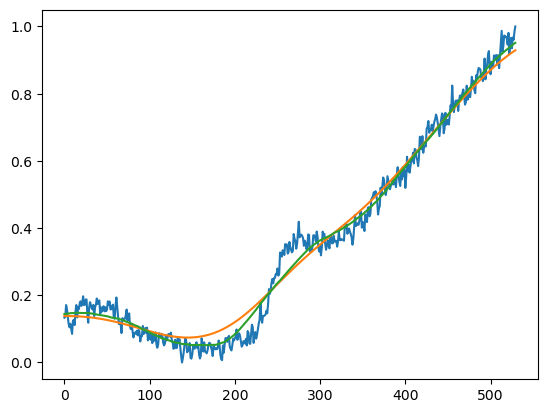

In [205]:
plt.plot(np.array([img1_1D, img1_1Dgf, img1_1Duf]).T)

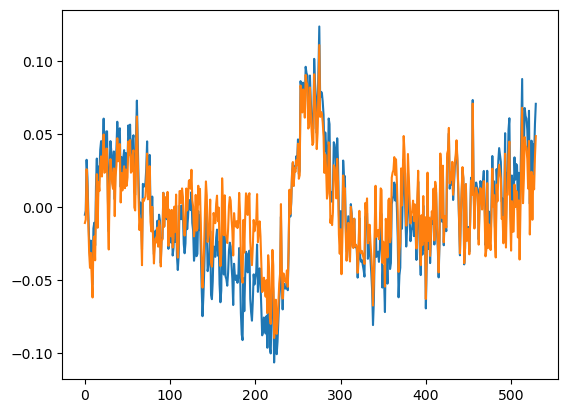

In [206]:
diff1Dgf = img1_1D - img1_1Dgf
diff1Duf = img1_1D - img1_1Duf

plt.plot(np.array([diff1Dgf, diff1Duf]).T)

In [207]:
thr1Dgf = threshold_otsu(diff1Dgf)
thr1Duf = threshold_otsu(diff1Duf)

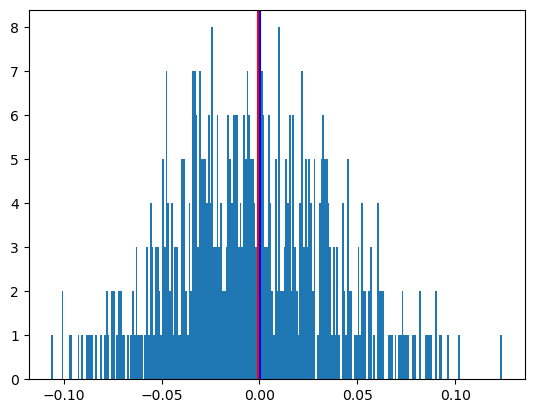

In [208]:
plt.hist(diff1Dgf, bins=256)
plt.axvline(thr1Dgf, c='r')
plt.axvline(thr1Duf, c='b')

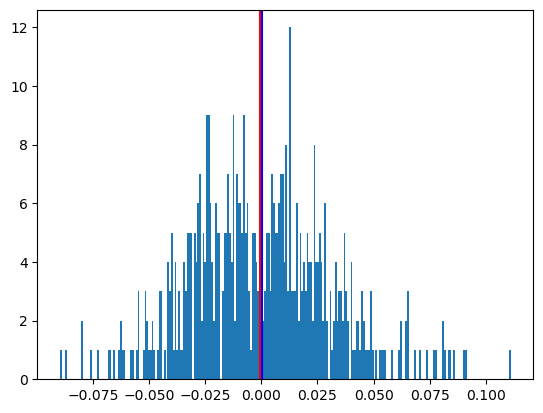

In [209]:
plt.hist(diff1Duf, bins=256)
plt.axvline(thr1Dgf, c='r')
plt.axvline(thr1Duf, c='b')

In [210]:
print('{:.4e}'.format(thr1Dgf))

-7.1312e-04


In [211]:
thr1Dgf

-0.00071311910373726

In [272]:
mask1Duf = diff1Duf < (thr1Duf)

ii = 5
mask1Duf = ndimage.binary_dilation(mask1Duf, iterations=ii)
mask1Duf = ndimage.binary_erosion(mask1Duf, iterations=ii)

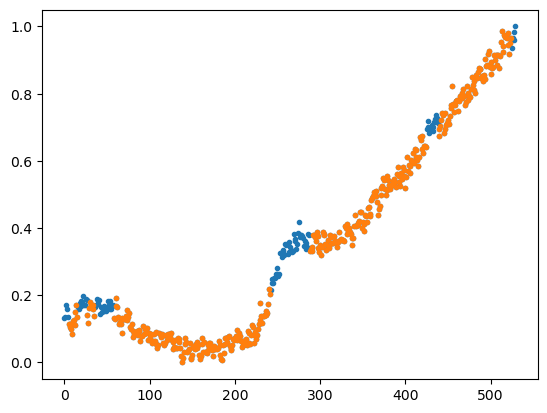

In [273]:
# mask1Duf = diff1Dgf < (thr1Dgf)
plt.plot(xx, img1_1D, '.')
plt.plot(xx[mask1Duf], img1_1D[mask1Duf], '.')

In [268]:
mask1Duf = diff1Dgf < (thr1Dgf)

ii = 5
mask1Duf = ndimage.binary_dilation(mask1Duf, iterations=ii)
mask1Duf = ndimage.binary_erosion(mask1Duf, iterations=ii)

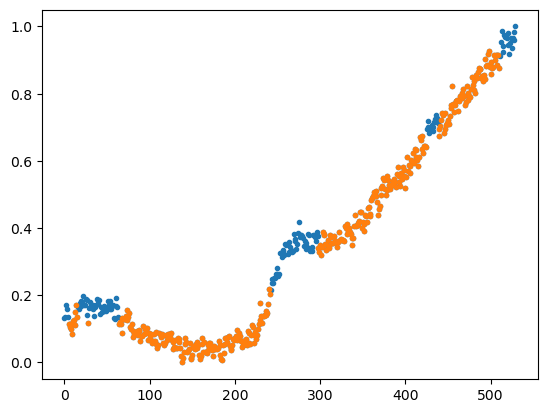

In [269]:
# mask1Duf = diff1Dgf < (thr1Dgf)
plt.plot(xx, img1_1D, '.')
plt.plot(xx[mask1Duf], img1_1D[mask1Duf], '.')

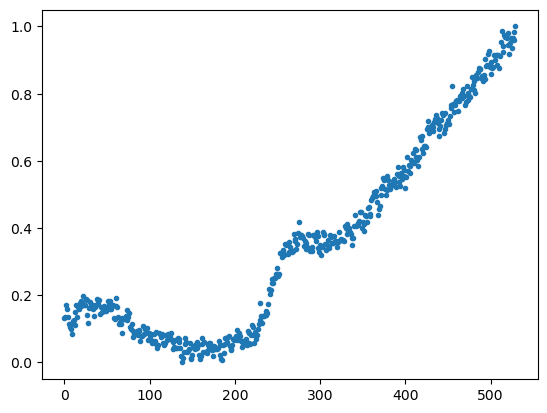

In [234]:
mask1Duf = diff1Dgf < (thr1Dgf)
plt.plot(xx, img1_1D, '.')

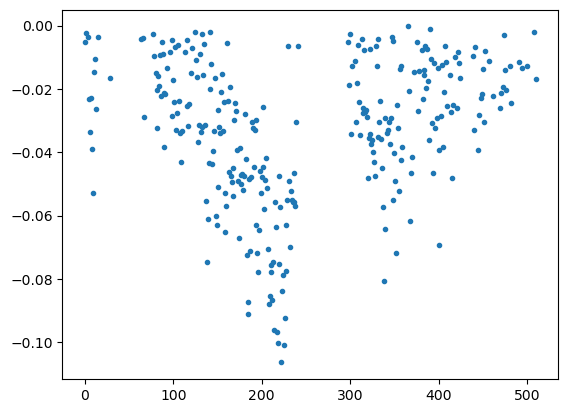

In [235]:
mask1Duf = diff1Dgf < thr1Dgf*0.1
plt.plot(xx[mask1Duf], diff1Dgf[mask1Duf], '.')

In [ ]:
dataFolder = 'C:\Users\Sommer Lab\Documents\Data\2023\07-2023\18 Jul 2023\Andor\odt align'

ImageAnalysisCode.AndorZyla


0. Atom Number from gauss fit = 1.87e+06
Amp_y: 23591768176.75
RMS cloud size y: 31.71 um

1. Atom Number from gauss fit = 7.11e+05
Amp_y: 7908875502.98
RMS cloud size y: 35.85 um

2. Atom Number from gauss fit = 3.19e+05
Amp_y: 4050731984.19
RMS cloud size y: 31.45 um

3. Atom Number from gauss fit = 1.28e+05
Amp_y: 1617008683.07
RMS cloud size y: 31.53 um

4. Atom Number from gauss fit = 7.93e+04
Amp_y: 992767224.21
RMS cloud size y: 31.88 um

5. Atom Number from gauss fit = 6.11e+05
Amp_y: 7621638062.76
RMS cloud size y: 31.97 um

The average number of atoms:6.20e+05
Mean RMS width x: 181.89 +/- 101.52 um
Mean RMS width y: 32.40 +/- 1.56 um


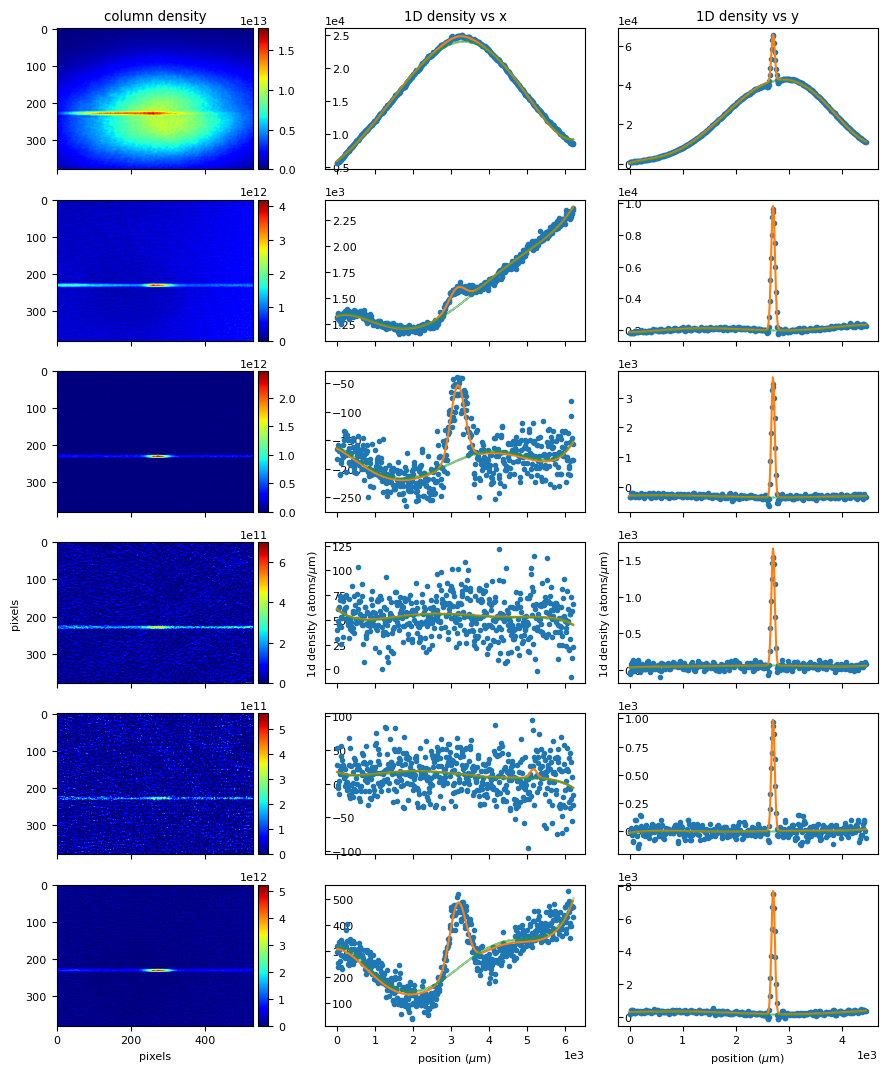

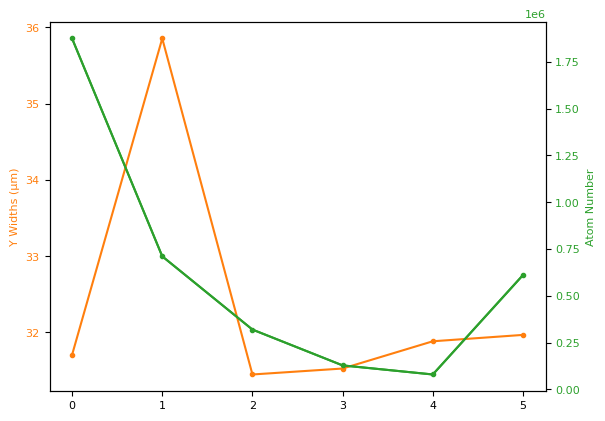

In [319]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 12 14:34:22 2023

@author: Sommer Lab
"""
from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import pandas as pd
import os

####################################
#Set the date and the folder name
####################################
data_path =r"Z:\ats317group\Data"
date = '7/18/2023'
data_folder = [r'/Andor/ODT Align']
####################################
#Parameter Setting
####################################
repetition = 1 #The number of identical runs to be averaged. 
examNum = 32 #The number of runs to exam.
examFrom = None #Set to None if you want to check the last several runs. 
plotPWindow = 6
do_plot = True
uniformscale = 0

variablesToDisplay = ['wait', 'D1_AOM_VCO' ]

showTimestamp = False

variableFilterList = None
# variableFilterList = ['VerticalBiasCurrent==0'] # NO SPACE around the operator!

pictureToHide = None
# pictureToHide = [4] # list(range(0,10,2))

subtract_bg = 1
signal_feature = 'narrow' 
signal_width = 40 #The narrower the signal, the bigger the number.
fitbgDeg = 5

rowstart = 10
rowend = -10
columnstart = 10
columnend = -10

# rowstart = 400
# rowend = 650
# columnstart = 400
# columnend = 700

# rowstart = 200
# rowend = 780
# columnstart = 200
# columnend = 900

####################################
####################################
dataLocation = ImageAnalysisCode.GetDataLocation(date,DataPath=data_path)
data_folder = [ dataLocation + f for f in data_folder ]
variableLog_folder = dataLocation + r'/Variable Logs'
examFrom, examUntil = ImageAnalysisCode.GetExamRange(examNum, examFrom, repetition)

t_exp = 10e-6
picturesPerIteration = 3
ms = 1e-3

class SIUnits:
    m = 1.0
    um = 1e-6*m
units=SIUnits()

params = ImageAnalysisCode.ExperimentParams(t_exp = t_exp, picturesPerIteration= picturesPerIteration, cam_type = "zyla")
images_array = None

for ff in data_folder:
    if images_array is None:
        images_array, fileTime = ImageAnalysisCode.LoadSpooledSeries(params = params, data_folder = ff, 
                                                                   return_fileTime=1)
    else:
        _images_array, _fileTime = ImageAnalysisCode.LoadSpooledSeries(params = params, data_folder = ff, 
                                                                       return_fileTime=1)
        images_array = np.concatenate([images_array, _images_array], axis=0)
        fileTime = fileTime + _fileTime

images_array = images_array[examFrom: examUntil]
fileTime = fileTime[examFrom: examUntil]

variableLog = ImageAnalysisCode.LoadVariableLog(variableLog_folder)
logTime = ImageAnalysisCode.Filetime2Logtime(fileTime, variableLog)
    
if variableFilterList is not None and variableLog is not None:    
    filteredList = ImageAnalysisCode.VariableFilter(logTime, variableLog, variableFilterList)
    images_array = np.delete(images_array, filteredList, 0)
    logTime = np.delete(logTime, filteredList, 0)

if pictureToHide is not None:
    images_array = np.delete(images_array, pictureToHide, 0)
    if logTime is not None:
        logTime = np.delete(logTime, pictureToHide, 0)

# ImageAnalysisCode.ShowImagesTranspose(images_array)

Number_of_atoms, N_abs, ratio_array, columnDensities, deltaX, deltaY = ImageAnalysisCode.absImagingSimple(images_array, 
                firstFrame=0, correctionFactorInput=1.0,  
                subtract_burntin=0, preventNAN_and_INF=True)

imgNo = len(columnDensities)
angle_deg= 2 #rotates ccw

AtomNumbers=[]
widths_x = []
widths_y = []
centers_x = []
centers_y = []


if uniformscale:
    vmax = columnDensities.max()
    vmin = columnDensities.min()
else:
    vmax = None
    vmin = 0

for ind in range(imgNo):
    
    if not do_plot:
        axs = [None] 
        plotInd = 0
        plotNo = None
    else:
        plotInd = ind % plotPWindow
        if plotInd == 0:
            # if ind//plotPWindow>0:
            #     fig.tight_layout()
            plotNo = min(plotPWindow, imgNo-ind)
            fig, axs = plt.subplots(plotNo , 3, figsize=(3*3, 1.8*plotNo), squeeze = False)
            plt.subplots_adjust(hspace=0.14, wspace=0.12)

        
    rotated_ = rotate(columnDensities[ind], angle_deg, reshape = False)[rowstart:rowend,columnstart:columnend]
    # rotated_=columnDensities[ind]
    if ind==0: #first time
        rotated_columnDensities =np.zeros((imgNo, *np.shape(rotated_)))
    rotated_columnDensities[ind] = rotated_

    #preview:
    dx=params.camera.pixelsize_meters/params.magnification
    
    popt0, popt1 = ImageAnalysisCode.fitgaussian2D(rotated_columnDensities[ind], dx=dx, 
                                                  do_plot = do_plot, ax=axs[plotInd], fig=fig, Ind=plotInd, imgNo=plotNo,
                                                  subtract_bg=subtract_bg, signal_feature=signal_feature, signal_width=signal_width, fitbgDeg=fitbgDeg,
                                                  vmax = vmax, vmin = vmin,
                                                  title="1D density", title2D="column density",
                                                  xlabel1D="position ($\mu$m)", ylabel1D="1d density (atoms/$\mu$m)",                                                  
                                                  xscale_factor=1/units.um, yscale_factor=units.um)
    
    if do_plot and variablesToDisplay is not None and variableLog is not None:
        variablesToDisplay = [ii.replace(' ','_') for ii in variablesToDisplay]
        axs[plotInd,0].text(0,1, 
                        variableLog.loc[logTime[ind]][variablesToDisplay].to_string(name=showTimestamp).replace('Name','Time'), 
                        fontsize=5, ha='left', va='top', transform=axs[plotInd,0].transAxes, 
                        bbox=dict(boxstyle="square", ec=(0,0,0), fc=(1,1,1), alpha=0.7))
    
        
    if popt0 is not None and popt1 is not None:
                
        amp_x, center_x, width_x, _ = popt0/units.um
        amp_y, center_y, width_y, _ = popt1/units.um
        
        # guess = [amp_g, center_g, w_g, offset_g]
        
        
        # wx = abs(popt0[2])
        AtomNumberX = amp_x * width_x * (2*np.pi)**0.5 * units.um * units.um
        
        # wy = abs(popt1[2])
        AtomNumberY = amp_y * width_y * (2*np.pi)**0.5 * units.um * units.um
        
        AtomNumbers.append(AtomNumberY)
        print("\n{}. Atom Number from gauss fit = {:.2e}".format(ind, AtomNumberY))
        # width_x = popt0[2]/units.um
        
        print("Amp_y: {:.2f}".format(amp_y * units.um))
        print("RMS cloud size y: {:.2f} um".format(width_y))
        # print("x center: {:.2f} um".format(center_x))
        # print("y center: {:.2f} um".format(center_y))
        centers_x.append(center_x)
        centers_y.append(center_y)
        widths_x.append(width_x)
        widths_y.append(width_y)

    fig.tight_layout()

print('\nThe average number of atoms:{:.2e}'.format(np.mean(AtomNumbers)))
    
print("Mean RMS width x: {:.2f} +/- {:.2f} um".format(np.mean(widths_x), np.std(widths_x)))
print("Mean RMS width y: {:.2f} +/- {:.2f} um".format(np.mean(widths_y), np.std(widths_y)))


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

if repetition > 1:
    widths_y = np.array(widths_y).reshape(-1, repetition)
    AtomNumbers = np.array(AtomNumbers).reshape(-1, repetition)
    
    widths_y_std = widths_y.std(axis=1)
    AtomNumbers_std = AtomNumbers.std(axis=1)
    
    widths_y = widths_y.mean(axis=1)
    AtomNumbers = AtomNumbers.mean(axis=1)
else:
    widths_y_std = None
    AtomNumbers_std = None

xx = np.arange(len(widths_y))

ax1.errorbar(xx, widths_y, widths_y_std, capsize=8, color='tab:orange')
ax1.plot(xx, widths_y, '.', color='tab:orange')
ax1.set_ylabel('Y Widths (µm)', color='tab:orange')
ax1.tick_params(axis="y", labelcolor='tab:orange')

ax2.errorbar(xx, AtomNumbers, AtomNumbers_std, capsize=5, color='tab:green')
ax2.plot(xx, AtomNumbers, '.-', color='tab:green')
ax2.set_ylabel('Atom Number', color='tab:green')
ax2.tick_params(axis="y", labelcolor='tab:green')
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

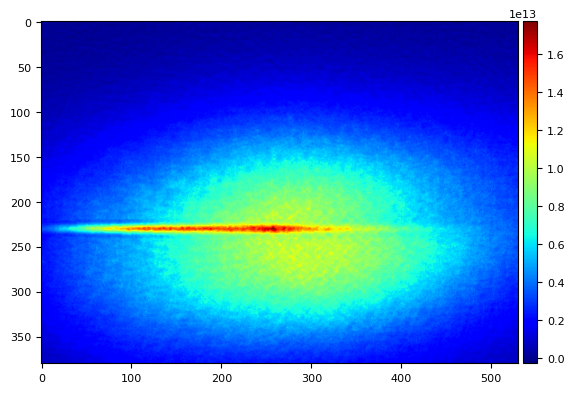

In [318]:
fig, ax = plt.subplots()

im = ax.imshow(img0, cmap='jet')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)

plt.colorbar(im, cax=cax)

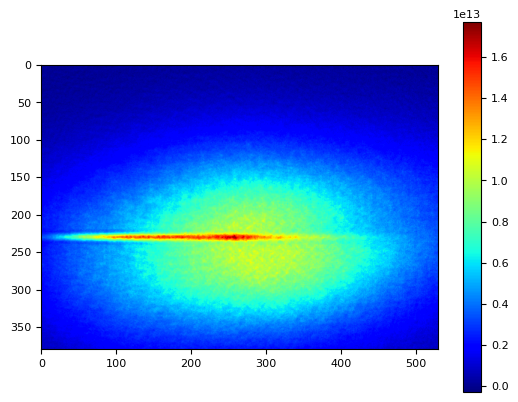

In [307]:
plt.imshow(img0, cmap='jet')
plt.colorbar()

In [295]:
from mpl_toolkits.axes_grid1 import make_axes_locatable




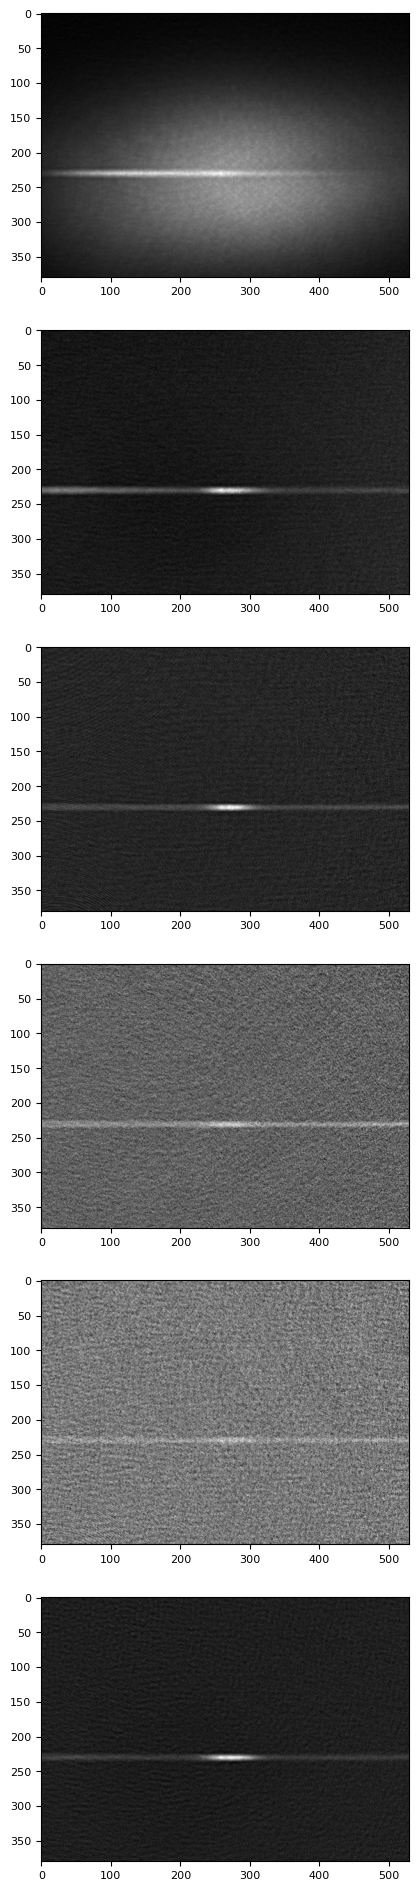

In [298]:
imgNo = len(imgs)
fig, axs = plt.subplots(imgNo,1, figsize=(5,4*imgNo))
for ii, img in enumerate(imgs):
    im = axs[ii].imshow(img)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

In [301]:
make_axes_locatable?

In [300]:
np.sum?

In [422]:
aa = np.random.rand(5,5)

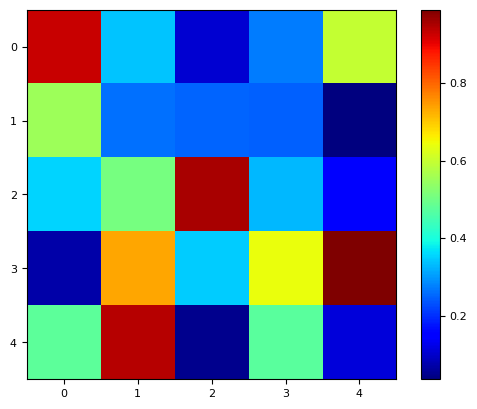

In [425]:
plt.imshow(aa, cmap='jet')
plt.colorbar()

AttributeError: 'Axes' object has no attribute 'get_array'

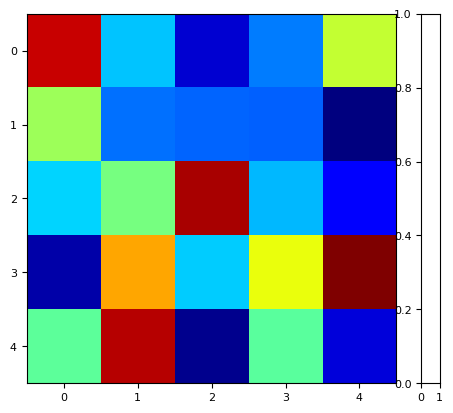

In [429]:
fig, ax = plt.subplots()
ax.imshow(aa, cmap='jet')
plt.colorbar(ax)